# **House Sales Price Study**

## Objectives

* Answer business requirement 1:
  * The client is interested to identify the house variables most strongly correlated with sale price.

## Inputs

* outputs/datasets/collection/house_prices_after_inspection.csv

## Outputs

* Generate code that answers business requirement 1 and can be used to build the Streamlit App

---

# Change working directory to the parent folder

Access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/PP5-heritage-housing-issues/jupyter_notebooks'

Make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/PP5-heritage-housing-issues'

# Load the Data

In [4]:
import pandas as pd
df = pd.read_csv("outputs/datasets/collection/house_prices_after_inspection.csv")
#df.head()
df.tail()

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
1455       953     694.0           3.0           No           0          Unf   
1456      2073       0.0           NaN           No         790          ALQ   
1457      1188    1152.0           4.0           No         275          GLQ   
1458      1078       0.0           2.0           Mn          49          NaN   
1459      1256       0.0           3.0           No         830          BLQ   

      BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotFrontage  \
1455        953            NaN         460          RFn  ...         62.0   
1456        589            NaN         500          Unf  ...         85.0   
1457        877            NaN         252          RFn  ...         66.0   
1458          0          112.0         240          Unf  ...         68.0   
1459        136            0.0         276          Fin  ...         75.0   

      MasVnrArea OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  \
1455         0.0          40            5            6          953   
1456       119.0           0            6            6         1542   
1457         0.0          60            9            7         1152   
1458         0.0           0            6            5         1078   
1459         0.0          68            6            5         1256   

      WoodDeckSF  YearBuilt  YearRemodAdd  SalePrice  
1455         0.0       1999          2000     175000  
1456         NaN       1978          1988     210000  
1457         NaN       1941          2006     266500  
1458         NaN       1950          1996     142125  
1459       736.0       1965          1965     147500  

[5 rows x 24 columns]

In [5]:
df_house_price_study = df.copy()
df_house_price_study.tail()

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
1455       953     694.0           3.0           No           0          Unf   
1456      2073       0.0           NaN           No         790          ALQ   
1457      1188    1152.0           4.0           No         275          GLQ   
1458      1078       0.0           2.0           Mn          49          NaN   
1459      1256       0.0           3.0           No         830          BLQ   

      BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotFrontage  \
1455        953            NaN         460          RFn  ...         62.0   
1456        589            NaN         500          Unf  ...         85.0   
1457        877            NaN         252          RFn  ...         66.0   
1458          0          112.0         240          Unf  ...         68.0   
1459        136            0.0         276          Fin  ...         75.0   

      MasVnrArea OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  \
1455         0.0          40            5            6          953   
1456       119.0           0            6            6         1542   
1457         0.0          60            9            7         1152   
1458         0.0           0            6            5         1078   
1459         0.0          68            6            5         1256   

      WoodDeckSF  YearBuilt  YearRemodAdd  SalePrice  
1455         0.0       1999          2000     175000  
1456         NaN       1978          1988     210000  
1457         NaN       1941          2006     266500  
1458         NaN       1950          1996     142125  
1459       736.0       1965          1965     147500  

[5 rows x 24 columns]

# Create a profile report for quick Exploratory Data Analysis (EDA)

In [6]:
from ydata_profiling import ProfileReport
profile_report= ProfileReport(df=df_house_price_study, minimal=True)
#profile_report
#profile_report.to_notebook_iframe()

## EDA Observations

* This dataset hast a predominance for numerical variables.
* Only 4 variables are categorical: BsmtExposure, BsmtFinType1, GarageFinish and KitchenQual.
* The 4 categorical variables are imbalanced.
* Several variables have missing values and zeros.
* Most numerical variables seem to be not normally distributed. 

# Handle Missing Values (NaN)

* Handle missing data before performing correlation analysis

Step 1: Confirm the variables with missing values

In [7]:
df_house_price_study.isnull().sum().to_frame(name="Is Null")

Is Null
1stFlrSF             0
2ndFlrSF            86
BedroomAbvGr        99
BsmtExposure        38
BsmtFinSF1           0
BsmtFinType1       145
BsmtUnfSF            0
EnclosedPorch     1324
GarageArea           0
GarageFinish       235
GarageYrBlt         81
GrLivArea            0
KitchenQual          0
LotArea              0
LotFrontage        259
MasVnrArea           8
OpenPorchSF          0
OverallCond          0
OverallQual          0
TotalBsmtSF          0
WoodDeckSF        1305
YearBuilt            0
YearRemodAdd         0
SalePrice            0

Step 2: Categorical variables -> Handle their missing data

* Retrieve the categorical variables

In [8]:
categorical_variables = df_house_price_study.select_dtypes(include='object').columns.to_list()
categorical_variables

['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']

* Assess the frequency of their values

In [9]:
for col in categorical_variables:
    print(df_house_price_study[col].value_counts())

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64
BsmtFinType1
Unf    396
GLQ    385
ALQ    202
BLQ    136
Rec    126
LwQ     70
Name: count, dtype: int64
GarageFinish
Unf    546
RFn    366
Fin    313
Name: count, dtype: int64
KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64


* Perform Categorical Imputation: Replace missing values for the categorical variables with the word "Missing"

In [10]:
from feature_engine.imputation import CategoricalImputer
categorical_imputer= CategoricalImputer(imputation_method='missing',
                                                  fill_value='Missing',
                                                  variables=categorical_variables)
df_categ_imputed =categorical_imputer.fit_transform(df_house_price_study)

/home/cistudent/.local/lib/python3.12/site-packages/feature_engine/imputation/categorical.py:232: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X[variable]):


* Confirm that the categorical variables do not have misssing values 

In [11]:
df_categ_imputed[categorical_variables].isnull().sum().to_frame(name="Is Null")

Is Null
BsmtExposure        0
BsmtFinType1        0
GarageFinish        0
KitchenQual         0

* Assess the frequency of their values now including the "Missing" category

In [12]:
for col in categorical_variables:
    print(df_categ_imputed[col].value_counts())

BsmtExposure
No         953
Av         221
Gd         134
Mn         114
Missing     38
Name: count, dtype: int64
BsmtFinType1
Unf        396
GLQ        385
ALQ        202
Missing    145
BLQ        136
Rec        126
LwQ         70
Name: count, dtype: int64
GarageFinish
Unf        546
RFn        366
Fin        313
Missing    235
Name: count, dtype: int64
KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64


In [13]:
profile_report_categ = ProfileReport(df=df_categ_imputed, minimal=True)
#profile_report_categ.to_notebook_iframe()

Step 3: Numerical variables -> Handle their missing data as well

* Check normality (based on the results below, the numerical variables are not normally distributed)

In [14]:
import pingouin as pg
pg.normality(data=df_categ_imputed, alpha = 0.05)

W          pval  normal
1stFlrSF       0.926946  4.513223e-26   False
2ndFlrSF       0.766299  2.292182e-40   False
BedroomAbvGr   0.849687  4.357370e-34   False
BsmtFinSF1     0.847960  2.813854e-35   False
BsmtUnfSF      0.930422  1.639911e-25   False
EnclosedPorch  0.431425  9.674916e-21   False
GarageArea     0.975327  4.016963e-15   False
GarageYrBlt    0.920943  2.816783e-26   False
GrLivArea      0.927983  6.597610e-26   False
LotArea        0.351059  7.933654e-58   False
LotFrontage    0.880403  2.001692e-29   False
MasVnrArea     0.639286  6.556645e-48   False
OpenPorchSF    0.727167  1.135905e-43   False
OverallCond    0.828923  6.774229e-37   False
OverallQual    0.948008  2.686457e-22   False
TotalBsmtSF    0.917352  1.611332e-27   False
WoodDeckSF     0.777193  4.451481e-14   False
YearBuilt      0.925597  2.770220e-26   False
YearRemodAdd   0.862800  6.720281e-34   False
SalePrice      0.869671  3.206141e-33   False

In [ ]:
numerical_variables = df_categ_imputed.select_dtypes(include="number").columns
print(len(numerical_variables))

20


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

def DistributionPlot(n_cols, numerical_variables, df):
    n_rows = (len(numerical_variables) + n_cols - 1) // n_cols

    # Create the figure and subplots grid
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

    # Flatten the axes array if there's more than one row/column
    axes = axes.flatten()

    # Iterate through columns and plot on respective axes
    for i, col in enumerate(numerical_variables):
        sns.histplot(data=df, x=col, kde=True, ax=axes[i]) 
        axes[i].set_title(f'Distribution of {col}')

    # Remove unused subplots
    for j in range(len(numerical_variables), len(axes)):
        fig.delaxes(axes[j])

    # Prevent titles from overlapping
    plt.tight_layout()

    plt.show()


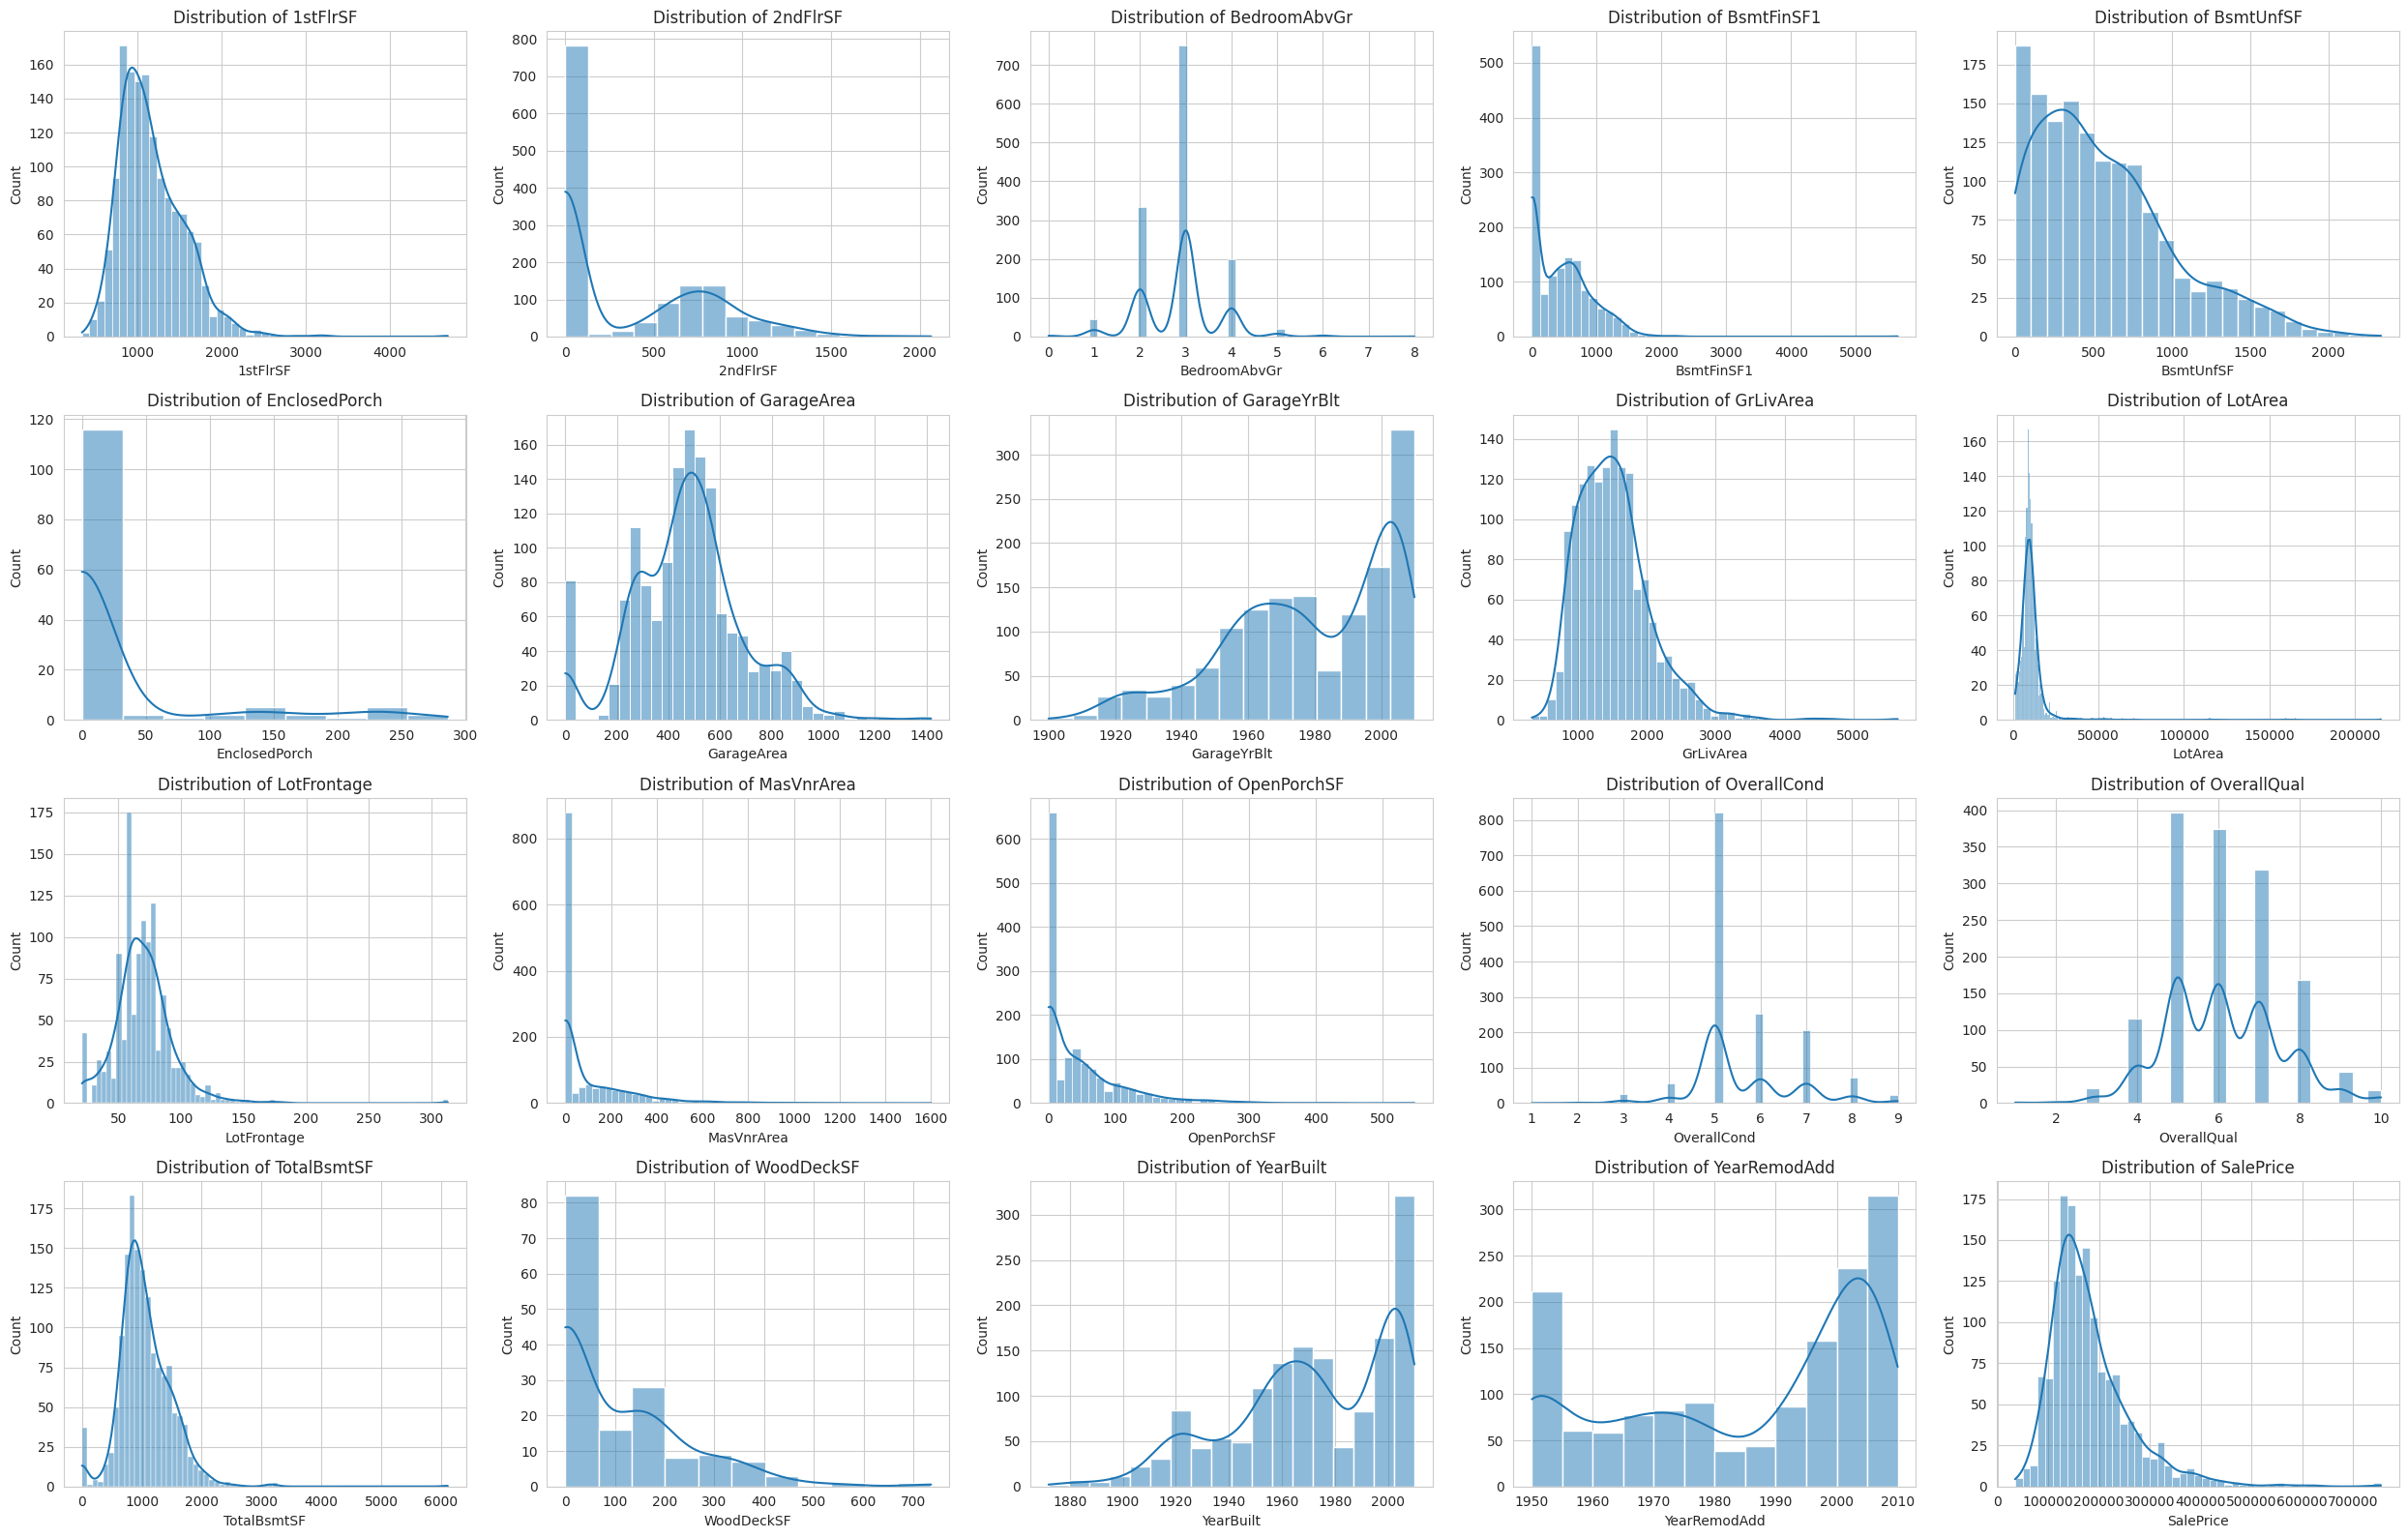

In [40]:
DistributionPlot(n_cols =5, numerical_variables = numerical_variables,
                  df = df_categ_imputed)


* Retrieve the numerical variables as a list

In [16]:
numerical_variables = df_categ_imputed.select_dtypes(include="number").columns.to_list()
numerical_variables

['1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'EnclosedPorch',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'LotArea',
 'LotFrontage',
 'MasVnrArea',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'SalePrice']

* Perform Median Imputation: Replace missing values for the numerical variables with the median value of the variable

In [17]:
from feature_engine.imputation import MeanMedianImputer
numerical_imputer = MeanMedianImputer(imputation_method='median',
                            variables= numerical_variables)

df_categ_and_numb_imputed = numerical_imputer.fit_transform(df_categ_imputed)


* Confirm that all variables do not have misssing values 

In [18]:
df_categ_and_numb_imputed.isnull().sum().to_frame(name="Is Null")

Is Null
1stFlrSF             0
2ndFlrSF             0
BedroomAbvGr         0
BsmtExposure         0
BsmtFinSF1           0
BsmtFinType1         0
BsmtUnfSF            0
EnclosedPorch        0
GarageArea           0
GarageFinish         0
GarageYrBlt          0
GrLivArea            0
KitchenQual          0
LotArea              0
LotFrontage          0
MasVnrArea           0
OpenPorchSF          0
OverallCond          0
OverallQual          0
TotalBsmtSF          0
WoodDeckSF           0
YearBuilt            0
YearRemodAdd         0
SalePrice            0

* Check once again their distribution (the numerical variables are still not normally distributed)

In [ ]:
DistributionPlot(n_cols =5, numerical_variables = numerical_variables,
                  df = df_categ_and_numb_imputed)

pg.normality(data=df_categ_and_numb_imputed, alpha = 0.05)

# Correlation Study: Pearson and Spearman

**Goal:** identify how the target (SalesPrice) correlate to the variables, and retrieve the top 5 correlation variables for SalesPrice.

* Step 1: Handle M

* Step 1: Since Spearman and Peason need numeric variables: transform categorical variables to numerical variables using one hot encoding.

In [19]:
from feature_engine.encoding import OneHotEncoder
one_hot_encoder = OneHotEncoder(variables=df_categ_and_numb_imputed.select_dtypes(include='object').columns.to_list(), drop_last=False)
#one_hot_encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = one_hot_encoder.fit_transform(df_categ_and_numb_imputed)
df_ohe.head()

1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  EnclosedPorch  \
0       856     854.0           3.0         706        150            0.0   
1      1262       0.0           3.0         978        284            0.0   
2       920     866.0           3.0         486        434            0.0   
3       961       0.0           3.0         216        540            0.0   
4      1145       0.0           4.0         655        490            0.0   

   GarageArea  GarageYrBlt  GrLivArea  LotArea  ...  BsmtFinType1_BLQ  \
0         548       2003.0       1710     8450  ...                 0   
1         460       1976.0       1262     9600  ...                 0   
2         608       2001.0       1786    11250  ...                 0   
3         642       1998.0       1717     9550  ...                 0   
4         836       2000.0       2198    14260  ...                 0   

   BsmtFinType1_LwQ  GarageFinish_RFn  GarageFinish_Unf  GarageFinish_Missing  \
0                 0                 1                 0                     0   
1                 0                 1                 0                     0   
2                 0                 1                 0                     0   
3                 0                 0                 1                     0   
4                 0                 1                 0                     0   

   GarageFinish_Fin  KitchenQual_Gd  KitchenQual_TA  KitchenQual_Ex  \
0                 0               1               0               0   
1                 0               0               1               0   
2                 0               1               0               0   
3                 0               1               0               0   
4                 0               1               0               0   

   KitchenQual_Fa  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 40 columns]

### Evaluate if One Hot Encoding Worked

In [20]:
categorical_variables = df_ohe.select_dtypes(include='object').columns.to_list()
categorical_variables

[]

# Correlation Study

In [21]:
corr_pearson_top10 = df_ohe.corr(method='pearson', numeric_only=True)['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10).to_frame(name="Correlation Coefficient")
corr_pearson_top10

Correlation Coefficient
OverallQual                    0.790982
GrLivArea                      0.708624
GarageArea                     0.623431
TotalBsmtSF                    0.613581
1stFlrSF                       0.605852
YearBuilt                      0.522897
KitchenQual_TA                -0.519298
YearRemodAdd                   0.507101
KitchenQual_Ex                 0.504094
MasVnrArea                     0.472614

---

In [22]:
corr_spearman_top10 = df_ohe.corr(method='spearman', numeric_only=True)['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10).to_frame(name="Correlation Coefficient")
corr_spearman_top10

Correlation Coefficient
OverallQual                    0.809829
GrLivArea                      0.731310
YearBuilt                      0.652682
GarageArea                     0.649379
TotalBsmtSF                    0.602725
KitchenQual_TA                -0.581803
1stFlrSF                       0.575408
YearRemodAdd                   0.571159
GarageYrBlt                    0.563256
KitchenQual_Gd                 0.478583

In [23]:
combined_top_features = set(corr_pearson_top10[:5].index.to_list() + corr_spearman_top10[:5].index.to_list())
combined_top_features

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

Therefore we will investigate if:

* The sale price tends to increase as the first floor square footage increases.
* The sale price tends to increase as the size of the garage increases.
* The sale price tends to increase as the above-grade living area increases.
* The sale price tends to increase as the overall house material and finish of the house improves.
* The sale price tends to increase as the total square feet of basement area increases.
* The sale price tends to increase with newer construction dates  

In [24]:
vars_to_study=['1stFlrSF', 'GarageArea', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']
vars_to_study

['1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt']

In [25]:
df_eda_subset = df_house_price_study.filter(vars_to_study + ["SalePrice"])
df_eda_subset.head()

1stFlrSF  GarageArea  GrLivArea  OverallQual  TotalBsmtSF  YearBuilt  \
0       856         548       1710            7          856       2003   
1      1262         460       1262            6         1262       1976   
2       920         608       1786            7          920       2001   
3       961         642       1717            7          756       1915   
4      1145         836       2198            8         1145       2000   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

   1stFlrSF  GarageArea  GrLivArea  OverallQual  TotalBsmtSF  YearBuilt  \
0       856         548       1710            7          856       2003   
1      1262         460       1262            6         1262       1976   
2       920         608       1786            7          920       2001   
3       961         642       1717            7          756       1915   
4      1145         836       2198            8         1145       2000   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  


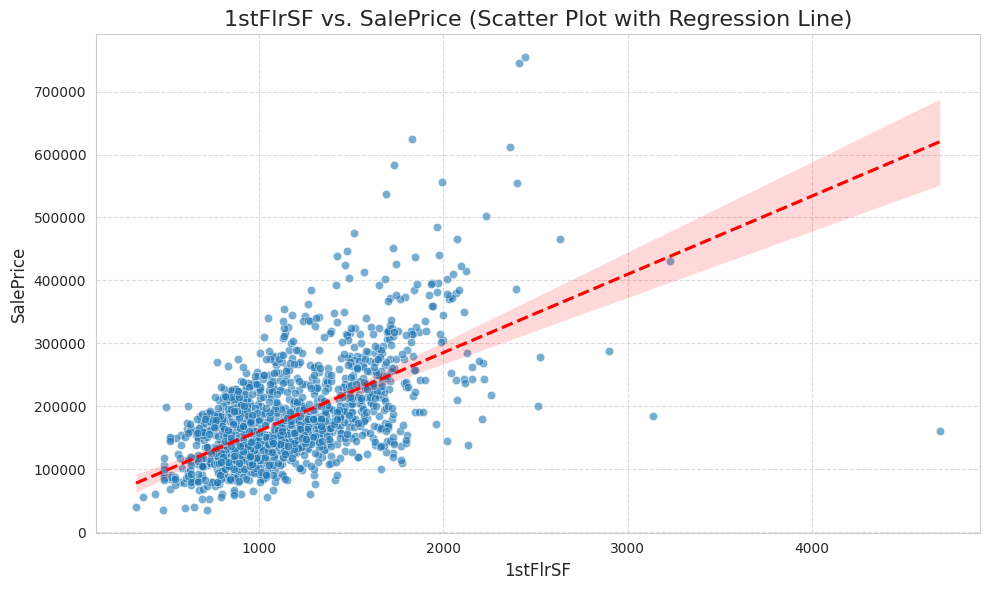

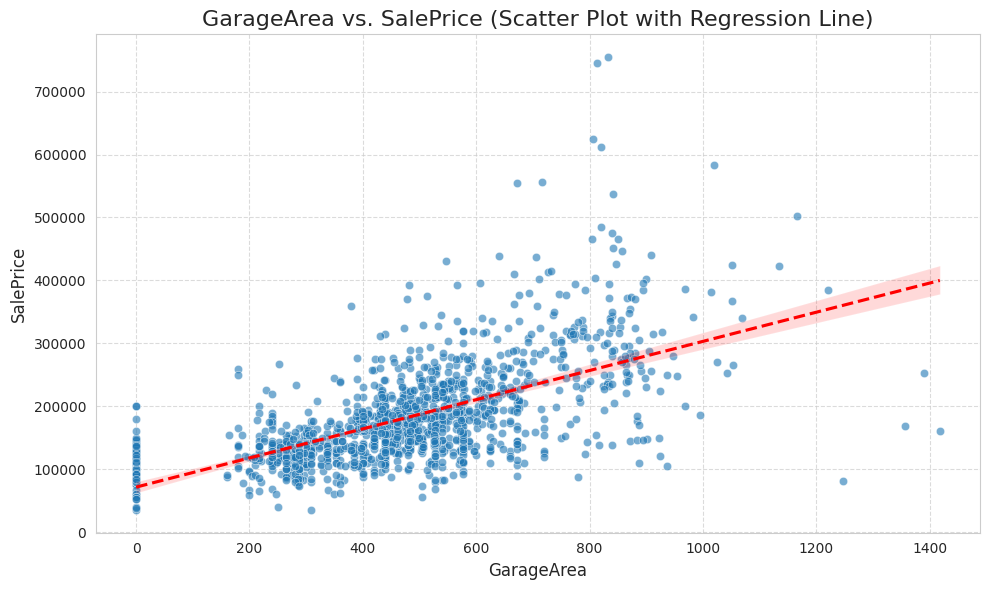

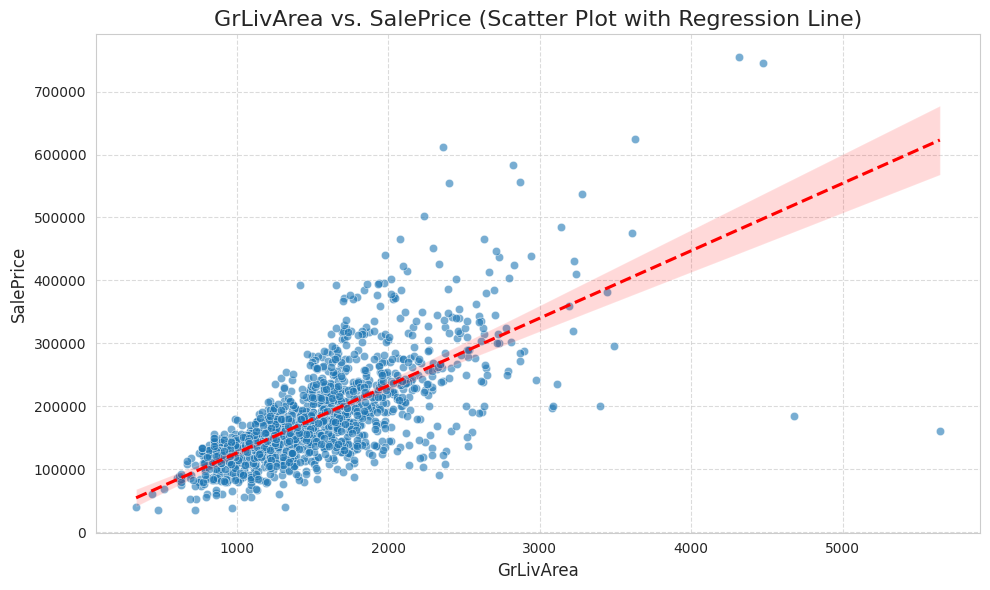

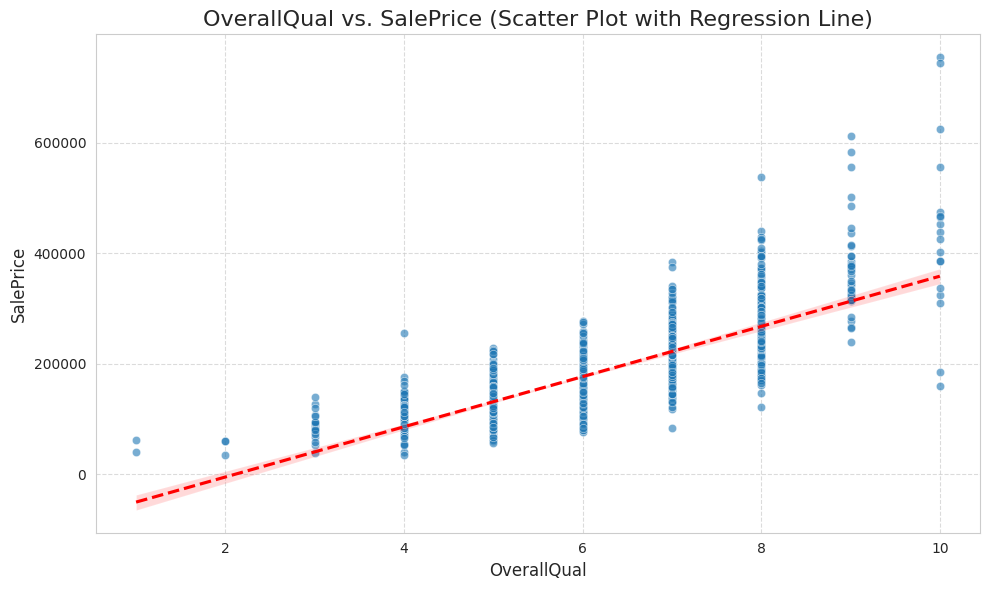

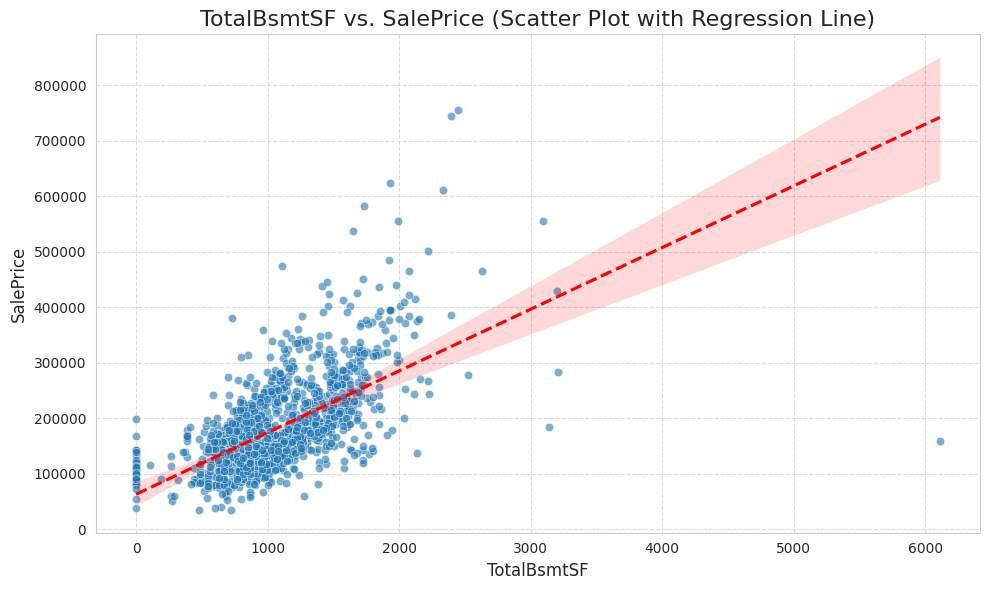

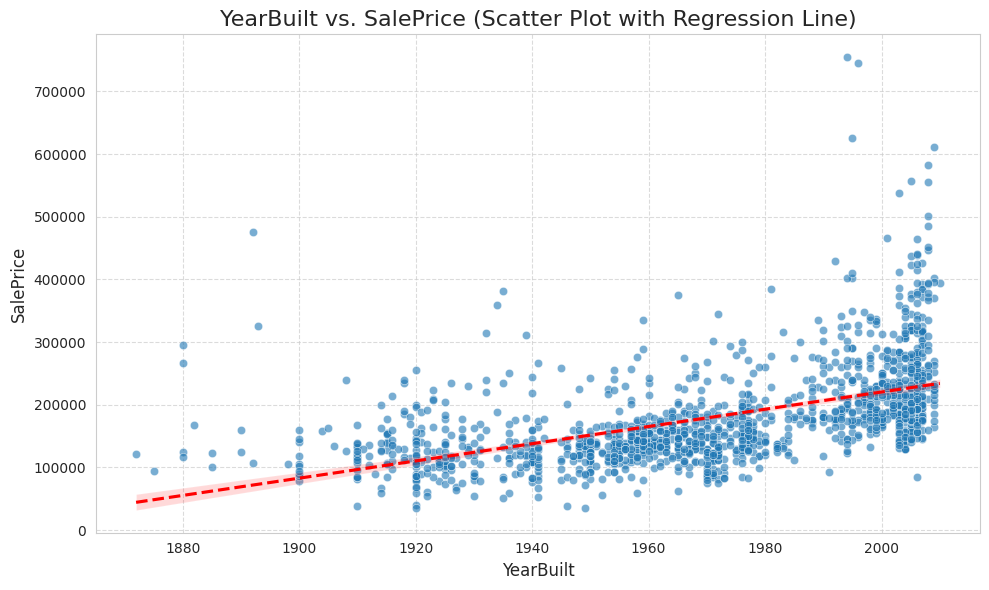

In [26]:
sns.set_style('whitegrid')

# %matplotlib inline

def plot_categorical(df, col, target_var):

    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=col, hue=target_var, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()
    plt.close()


def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target_var, kde=True, element="step")
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()
    plt.close()

def plot_numerical_vs_continuous(df, col, target_var):
    plt.figure(figsize=(10, 6))

    # Option A: Scatter Plot with Regression Line
    sns.scatterplot(data=df, x=col, y=target_var, alpha=0.6)
    sns.regplot(data=df, x=col, y=target_var, scatter=False, color='red', line_kws={'linestyle':'--'}) # Adds a regression line
    plt.title(f'{col} vs. {target_var} (Scatter Plot with Regression Line)', fontsize=16)

    # Option B: Joint Plot (provides scatter + marginal distributions)
    # Not using within the function, but mentioning as an alternative outside for deeper dives
    # g = sns.jointplot(data=df, x=col, y=target_var, kind='reg', height=8)
    # g.set_axis_labels(col, target_var, fontsize=12)
    # g.fig.suptitle(f'{col} vs. {target_var} (Joint Plot)', y=1.02, fontsize=16) # Title for jointplot

    plt.xlabel(col, fontsize=12)
    plt.ylabel(target_var, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    plt.close()

# Example usage:
# plot_numerical_vs_continuous(df_house_price_study, 'GrLivArea', 'SalePrice')
# plot_numerical_vs_continuous(df_house_price_study, 'YearBuilt', 'SalePrice')

print(df_eda_subset.head())
target_var = 'SalePrice'
for col in vars_to_study:
    if df_eda_subset[col].dtype == 'object':
        plot_categorical(df_eda_subset, col, target_var)
        print("\n\n")
    else:
        plot_numerical_vs_continuous(df_eda_subset, col, target_var)
        print("\n\n")

# Parallel Plot with numerical variables

In [27]:
import plotly.express as px
fig = px.parallel_coordinates(df_eda_subset, color="SalePrice",
                              dimensions = vars_to_study)
fig.show()

# px.colors.sequential.swatches() 

# fig = px.parallel_coordinates(df, color="species", color_continuous_scale='viridis')
# fig.show()




plot them 
parallel plot
Summary observations


# Conclusions

The correlations and plots interpretation converge.

* Sale prices are typically higher for homes with larger first-floor square footage.
* Sale prices are typically higher for homes with larger garages.
* Sale prices are typically higher for homes with larger above-grade living areas.
* Sale prices are typically higher when the overall quality of the house's materials and finish improves.
* Sale prices are typically higher for homes with larger total basement area.
* Sale prices are typically higher for homes that were recently constructed.   